In [39]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
import math
import time

In [40]:
def normalize(a):    
    return a/max(a)

Z=29
A=63

def ws(r):#wood-saxon r distribution
    R=4.21
    a=0.459
    return (1/(1+np.exp((r-R)/a)))*r**2

#hit and miss
def hmws():
    ctr=False
    while not ctr:
        x=random.uniform(0,8)
        y=random.uniform(0,12)
        if y<=ws(x):
            r=x
            ctr=True
    return r

#Comparison plot 
R=4.21
def wsr(r):#wood-saxon 
    a=0.459
    return (1/(1+np.exp((r-R)/a)))
xx=np.linspace(0,8,1000)
woodsaxon=np.zeros([len(xx),1])#Just a list for plotting wood saxon
for i in range(len(xx)):
    woodsaxon[i]=wsr(xx[i])

In [41]:
class Nucleon:
    
    def __init__(self, position,typ):
        self.xb,self.yb,self.zb=position
        if typ==True: #True for proton and False for neutron
            self.type='Proton'
        else: self.type='Neutron'
            
class Nucleus:
    def __init__(self, Z, A, method):
        self.A=A#later modified to create right number of protons and neutron
        self.protonnumber=Z #number of protons
        self.neutronnumber=A-Z
        self.method=method
        self.d=0.9 #Minimum distance between two nucleons
        
        
        self.rad=[]#r-coordinate of the nucleons
        
    
        
        self.proton=[] #list of protons
        self.neutron=[] #list of neutron
        self.nucleons=[]
    
    def generate_Nucleus(self): #generates a list of protons and neutrons
        for i in range(self.A):
            ctr=False
            while not ctr:  
                if self.method=='list':
                    rand=randomws()
                elif self.method=='hm':
                    rand=hmws()
                theta=np.arccos(2 * random.uniform(0,1) - 1)
                phi=random.uniform(0,2*np.pi)
                xxx=rand*np.sin(theta)*np.cos(phi)
                yyy=rand*np.sin(theta)*np.sin(phi)
                zzz=rand*np.cos(theta)
                fail=0
    
                for j in self.nucleons:
                    dist=np.sqrt((j.xb-xxx)**2+(j.yb-yyy)**2+(j.zb-zzz)**2)
                    if dist<self.d:
                        fail=1
                        break
                if fail==0:
                    ctr=True
                else: continue
            pos=np.array([xxx,yyy,zzz])
            self.nucleons.append(Nucleon(pos,True))
            self.rad.append(rand)
            
            
            typ=random.uniform(-1,1)#gives random pos or neg, If pos creates proton unless proton list is full and vice versa
            if typ>0 and len(self.proton)<self.protonnumber:
                self.proton.append(Nucleon(pos,True))
            elif typ<0 and len(self.neutron)<self.neutronnumber:
                self.neutron.append(Nucleon(pos, False))
            elif len(self.proton)==self.protonnumber:
                self.neutron.append(Nucleon(pos, False))
            else: self.proton.append(Nucleon(pos,True))
        #print(len(self.proton), len(self.neutron))
        
                
    def draw_Nucleus(self):
        plt.figure()
        xproton=[]
        yproton=[]
        xneutron=[]
        yneutron=[]
        for i in range(len(self.proton)):
            xproton.append(self.proton[i].xb)
            yproton.append(self.proton[i].yb)
        for i in range(len(self.neutron)):
            xneutron.append(self.neutron[i].xb)
            yneutron.append(self.neutron[i].yb)
        plt.plot(xproton,yproton, marker='.', linestyle='', color='red',label='proton')
        plt.plot(xneutron,yneutron, marker='.', linestyle='', color='blue',label='neutron')
        plt.legend()
                
    def draw_3D(self):
        xn=[]
        yn=[]
        zn=[]
        for i in self.nucleons:
            xn.append(i.xb)
            yn.append(i.yb)
            zn.append(i.zb)
        ax=plt.figure().add_subplot(projection='3d')
        ax.scatter(xn,yn,zn)
        
    def draw_Histogram(self):
        plt.figure()
        plt.xlim(0,2*R)
        cts,bins=np.histogram(self.rad,20)
        dens=[]
        for i in range(len(cts)):
            avbin=(bins[i]+bins[i+1])/2
            dens.append(cts[i]/((1/3)*np.pi*(bins[i+1]**3-bins[i]**3)))
        density=normalize(dens)
        plt.stairs(density,bins, label='Density distribution')
        plt.plot(xx,woodsaxon,label='Wood Saxon')
        plt.legend()

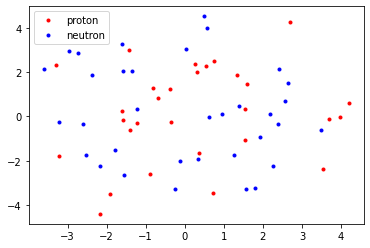

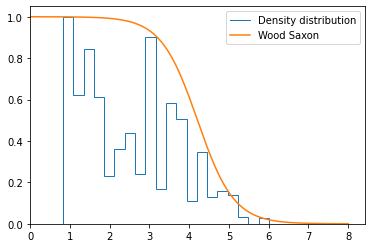

In [42]:
Atom=Nucleus(Z,A,'hm')
Atom.generate_Nucleus()
Atom.draw_Nucleus()
Atom.draw_Histogram()

Nuclei Generator

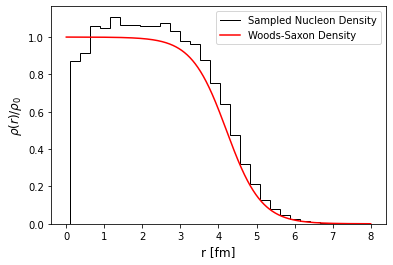

In [70]:
nuclei=[]
for i in range(0,1000):
    Cu=Nucleus(Z,A,'hm')
    Cu.generate_Nucleus()
    nuclei.append(Cu)
    
    
Nucl=[]
for i in nuclei:
    Nucl.extend(i.rad)
    
cts,bins=np.histogram(Nucl,30)
dens=[]
for i in range(len(cts)):
    dens.append(cts[i]/((1/3)*np.pi*(bins[i+1]**3-bins[i]**3)))
norm=0
for i in range(5):
    norm=norm+dens[i]/5
dens=dens/norm

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.stairs(dens,bins,label='Sampled Nucleon Density',color='black')
ax.plot(xx,woodsaxon,label='Woods-Saxon Density',color='red')
ax.set_ylabel(r"$\rho(r)/\rho_0$",fontsize=12)
ax.set_xlabel("r [fm]",fontsize=12)
ax.legend()
plt.show()
#fig.savefig('Nucleondensity100000.pdf')

Impact parameter sampler

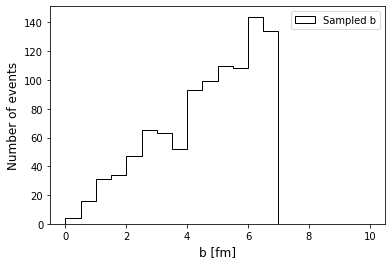

In [71]:
def sampleb(bMax):
    b = np.sqrt(bMax*bMax*random.uniform(0,1))
    angle=random.uniform(0,2*np.pi)
    return b,angle

blist=[]
anglelist=[]
for i in range(1000):
    b,angle=sampleb(7)
    blist.append(b)
    anglelist.append(angle)
    
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(blist, bins=20, range=[0,10],density=False, color='black',histtype="step",label='Sampled b')
ax.set_xlabel('b [fm]',fontsize=12)
ax.set_ylabel('Number of events',fontsize=12)
ax.legend()

#fig.savefig('Sampledb10000.pdf')

In [72]:
def collision(d,bdisk,opacity): #Black and Gray disk
        if d<bdisk:
            if random.uniform(0,1)<opacity**2:
                return 1
            else: return 0
        else: return 0

In [73]:
Ncollcu=[]
dist=[]
bdist=[]
bdisk=np.sqrt(4.382/np.pi)
for i in range(len(blist)):
    thet=anglelist[i]
    b=blist[i]
    xt=b*np.cos(thet)
    yt=b*np.sin(thet)
    col=0
    for j in nuclei[i].nucleons:
        d=np.sqrt((j.xb-xt)**2+(j.yb-yt)**2)
        col=col+collision(d,bdisk,1)
        if collision(d,bdisk,1)==1:
            dist.append(d/bdisk)

    if col!=0:
        Ncollcu.append(col)
        bdist.append(b)
        
        
Ncollcugray=[] 
for i in range(len(blist)):
    thet=anglelist[i]
    b=blist[i]
    xt=b*np.cos(thet)
    yt=b*np.sin(thet)
    col=0
    colgray=0
    for j in nuclei[i].nucleons:
        d=np.sqrt((j.xb-xt)**2+(j.yb-yt)**2)
        colgray=colgray+collision(d,bdisk,opacity=0.7)
    if colgray!=0:
        Ncollcugray.append(colgray)

Text(0, 0.5, '$P(N)$')

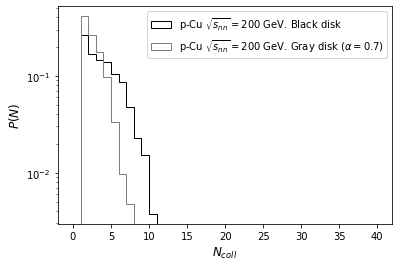

In [74]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(1,1,1)
ax4.hist(Ncollcu, range=[0,40], bins=40,density=True, histtype="step",color="black",label=r"p-Cu $\sqrt{s_{nn}}=200$ GeV. Black disk")
ax4.hist(Ncollcugray, range=[0,40], bins=40,density=True, histtype="step",color="gray",label=r"p-Cu $\sqrt{s_{nn}}=200$ GeV. Gray disk ($\alpha=0.7$)")
ax4.set_yscale('log')
ax4.legend()
ax4.set_xlabel(r"$N_{coll}$", fontsize=12)
ax4.set_ylabel(r"$P(N)$",fontsize=12)
#fig4.savefig('ProbforNcoll.pdf')

Calculating T

In [94]:
def T(opacity,bdisk):
    
    collpn=[]
    dval=[]

    #bdisk=np.sqrt(4.382/np.pi)
    for i in range(len(blist)):
        thet=anglelist[i]
        b=blist[i]
        xt=b*np.cos(thet)
        yt=b*np.sin(thet)
        col=0
        for j in nuclei[i].nucleons:
            d=np.sqrt((j.xb-xt)**2+(j.yb-yt)**2)
            col=collision(d,bdisk,opacity)
            dval.append(d)
            if col!=0:
                collpn.append(d)
        
    ctpn,binp=np.histogram(collpn,30,range=(0,1.5))
    ctb,binb=np.histogram(dval,30, range=(0,1.5))
    ppnn=[]
    for i in range(len(ctpn)):
        if ctb[i]==0:
            ppnn.append(0)
        else:    
            ppnn.append(np.sqrt(ctpn[i]/ctb[i]))
        
    return ppnn,binp



def Toscil(u,r1,r2,opacity1,opacity2):
    colla=[]
    dvala=[]
    collb=[]
    dvalb=[]
    dvaltot=[]
    colltot=[]
    #bdisk=np.sqrt(4.382/np.pi)
    for i in range(len(blist)):
        thet=anglelist[i]
        b=blist[i]
        xt=b*np.cos(thet)
        yt=b*np.sin(thet)
        for j in nuclei[i].nucleons:
            d=np.sqrt((j.xb-xt)**2+(j.yb-yt)**2)
            ra=random.uniform(0,1)
            dvaltot.append(d)
            if ra<u:
                dvala.append(d)
                col=collision(d,r1,opacity1)
                if col!=0:
                    colla.append(d)
                    colltot.append(d)
            elif ra>u:
                dvalb.append(d)
                col=collision(d,r2,opacity2)
                if col!=0:
                    collb.append(d)
                    colltot.append(d)
        
    ctpna,binpa=np.histogram(colla,50,range=(0,1.5))
    ctba,binba=np.histogram(dvala,50, range=(0,1.5))
    ppnna=[]
    Pa=[]
    for i in range(len(ctpna)):
        if ctba[i]==0:
            ppnna.append(0)
            Pa.append(0)
        else:    
            ppnna.append(np.sqrt(ctpna[i]/ctba[i]))
            Pa.append(ctpna[i]/ctba[i])

    ctpnb,binpb=np.histogram(collb,50,range=(0,1.5))
    ctbb,binbb=np.histogram(dvalb,50, range=(0,1.5))
    ppnnb=[]
    Pb=[]
    for i in range(len(ctpnb)):
        if ctbb[i]==0:
            ppnnb.append(0)
            Pb.append(0)
        else:    
            ppnnb.append(np.sqrt(ctpnb[i]/ctbb[i]))
            Pb.append(ctpnb[i]/ctbb[i])
    
    
    ctpntot,binptot=np.histogram(colltot,50,range=(0,1.5))
    ctbtot,binbtot=np.histogram(dvaltot,50, range=(0,1.5))
    ppnntot=[]
    for i in range(len(ctpntot)):
        if ctbtot[i]==0:
            ppnntot.append(0)
        else:    
            ppnntot.append(np.sqrt(ctpntot[i]/ctbtot[i]))   
            
    sqrdp=[]      
    for i in range(len(ctpna)):
        sqrdp.append((Pa[i]*ctba[i]+Pb[i]*ctbb[i])/(ctba[i]+ctbb[i]))
    
    return ppnntot,ppnna,ppnnb,sqrdp,binptot


1.1810308722710725


C:\Users\putos\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in longlong_scalars


Text(0.5, 0, '$r_{\\mathrm{bdisk}}$')

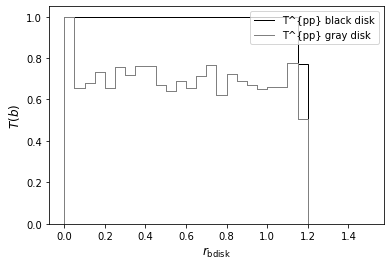

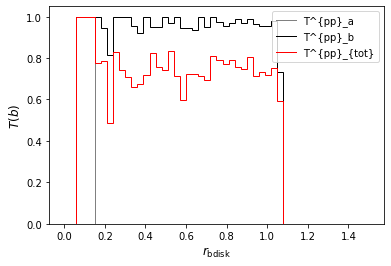

In [96]:
TT,BB=T(1,bdisk)
TTg,BBg=T(0.7,bdisk)
print(bdisk)
fig6 = plt.figure()
ax6 = fig6.add_subplot(1,1,1)
ax6.stairs(TT,BB, color='black', label=r'T^{pp} black disk')
ax6.stairs(TTg,BBg, color='gray', label=r'T^{pp} gray disk')
ax6.legend()
ax6.set_ylabel(r"$T(b)$", fontsize='12')
ax6.set_xlabel(r'$r_{\mathrm{bdisk}}$', fontsize='12')


ax6.stairs(TTg,BBg, color='gray', label=r'T^{pp} sampled gray')

TTT=Toscil(0.42,0.15,1.07,0.97,0.97)
Ttot=TTT[0]
Ta=TTT[1]
Tb=TTT[2]
Bin=TTT[-1]

fig7 = plt.figure()
ax7 = fig7.add_subplot(1,1,1)

ax7.stairs(Ta,Bin, color='grey', label=r'T^{pp}_a')
ax7.stairs(Tb,Bin, color='black', label=r'T^{pp}_b')
ax7.stairs(Ttot,Bin, color='red',label=r'T^{pp}_{tot}' )
ax7.legend()
ax7.set_ylabel(r"$T(b)$", fontsize='12')
ax7.set_xlabel(r'$r_{\mathrm{bdisk}}$', fontsize='12')


In [77]:
def sigma(opacity, bdisk):
    Tea,bean=T(opacity,bdisk)
    dA=[]
    for i in range(len(Tea)):
        dA.append(np.pi*(bean[i+1]**2-bean[i]**2)*10) #factor of 10, fm^2 to mb
    
    dsigtot=[]
    dsigel=[]
    for i in range(len(Tea)):
        dsigtot.append(Tea[i]*2*dA[i])
        dsigel.append(Tea[i]**2*dA[i])
    
    sigmatot=sum(dsigtot)
    sigmael=sum(dsigel)
    
    return [sigmatot,sigmael]

def sigmaoscil(u,r1,r2,opacity1,opacity2):
    Tee=Toscil(u,r1,r2,opacity1,opacity2)
    Ttot=Tee[0]
    Ta=Tee[1]
    Tb=Tee[2]
    Tp=Tee[3]
    Bin=Tee[-1]
    dA=[]
    for i in range(len(Ttot)):
        dA.append(np.pi*(Bin[i+1]**2-Bin[i]**2)*10) #factor of 10, fm^2 to mb
    dsigtot=[]
    dsigel=[]
    dwounded=[]
    ddiff=[]
    for i in range(len(Ttot)):
        dsigtot.append(Ttot[i]*2*dA[i])
        dsigel.append(Ttot[i]**2*dA[i])
        dwounded.append((2*Ttot[i]-Tee[3][i])*dA[i])
        ddiff.append((Tee[3][i]-Ttot[i]**2)*dA[i])
    
    sigmatot=sum(dsigtot)
    sigmael=sum(dsigel)
    sigmawounded=sum(dwounded)
    sigmadiff=sum(ddiff)
    return [sigmatot,sigmael,sigmawounded,sigmadiff]

# Energy dependence

In [78]:
mass_proton=0.93827208816 #[GeV]
i=0
Plab=[]
Crosssec=[]
sqrtsunsorted=[]
errp=[]
errm=[]
with open('totaledep.txt','r') as f:
    for line in f.readlines()[235:298]:
        number, plab,plabmin,plabmax,sig, staerrp, staerrm, rest=line.split(maxsplit=7)
        if float(staerrp)!=0 or float(staerrm)!=0:
            Plab.append(float(plab)) #GeV
            Crosssec.append(float(sig))
            sqrtsunsorted.append(np.sqrt(2*float(plab)*mass_proton))
            errp.append(float(staerrp))
            errm.append(float(staerrm))
            
sqrts=sqrtsunsorted#np.sort(sqrtsunsorted)


Crosssecel=[]
sqrtselunsorted=[]
errpel=[]
errmel=[]
with open('elasticedep.txt','r') as f:
    for line in f.readlines()[140:165]:#140-165
        number, plab,plabmin,plabmax,sig, staerrp, staerrm, rest=line.split(maxsplit=7)
        if float(staerrp)!=0 or float(staerrm)!=0:
            Crosssecel.append(float(sig))
            sqrtselunsorted.append(np.sqrt(2*float(plab)*mass_proton))
            errpel.append(float(staerrp))
            errmel.append(float(staerrm))
            
sqrtsel=sqrtselunsorted#np.sort(sqrtselunsorted)


In [79]:
def fi(E,a,b,c):
    return a*E**b+c

partot,covtot=curve_fit(fi,xdata=sqrts,ydata=Crosssec)
parel,covel=curve_fit(fi,sqrtsel,Crosssecel)
ener=np.linspace(20,10000,1000)
totfit=[]
elfit=[]
for i in ener:
    totfit.append(fi(i,partot[0],partot[1],partot[2]))
    elfit.append(fi(i,parel[0],parel[1],parel[2]))

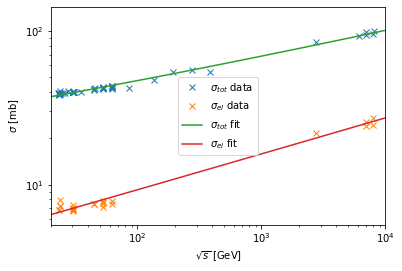

In [80]:
fig12 = plt.figure()
ax12 = fig12.add_subplot(1,1,1)
ax12.plot(sqrts,Crosssec, marker='x',linestyle='', label=r'$\sigma_{tot}$ data')
ax12.plot(sqrtsel,Crosssecel,marker='x',linestyle='', label=r'$\sigma_{el}$ data')
ax12.plot(ener,totfit, label=r'$\sigma_{tot}$ fit')
ax12.plot(ener,elfit, label=r'$\sigma_{el}$ fit')
ax12.set_yscale('log')
ax12.set_xscale('log')
ax12.set_xlim(20,10000)
ax12.set_ylabel(r"$\sigma$ [mb]")
ax12.set_xlabel(r"$\sqrt{s}$ [GeV]")
ax12.legend()

In [81]:
def fitbdisk(En,a,b,c):
    return a*np.log(En*b)+c
def fitfunction(E,a,b,c):
    sigmarray=np.zeros(len(E))
    for i in range(len(E)):
        radius=fitbdisk(E[i],a,b,c)
        sigmarray[i]=sigma(1,radius)[0]
    return sigmarray

par,cov=curve_fit(fitfunction,xdata=sqrts,ydata=Crosssec,sigma=errp,p0=[0.25,0.1,0], bounds=((-np.inf,-np.inf,-np.inf),(np.inf, np.inf,np.inf)),  method='trf', diff_step=0.1)


In [82]:
test=[]
xxxx=np.concatenate((np.linspace(20,100,10),np.linspace(100,10e4,100)))
for i in xxxx:
    test.append(sigma(1,fitbdisk(i,par[0],par[1],par[2]))[0])

Text(0.5, 0, '$\\sqrt{s}$\\ [GeV]')

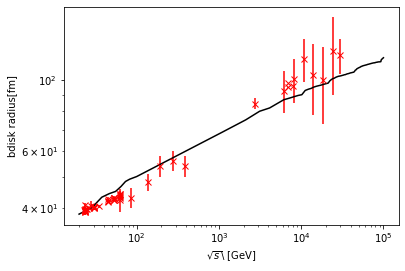

In [83]:
fig11 = plt.figure()
ax11 = fig11.add_subplot(1,1,1)
ax11.errorbar(x=sqrts,y=Crosssec,yerr=[errm,errp],linestyle='', marker='x',label='bdisk sqrts equiv', color='red')
#ax11.plot(sqrts,Crosssec, linestyle='', marker='x',label='bdisk sqrts equiv', color='red')
ax11.plot(xxxx,test, linestyle='-', marker='',color='black', label='Data fit')
ax11.set_yscale('log')
ax11.set_xscale('log')
ax11.set_ylabel(r"bdisk radius[fm]")
ax11.set_xlabel(r"$\sqrt{s}$\ [GeV]")

In [84]:
def fitopacity(En,d,e):
    if En==0:
        return 0
    else:
        return d+e*np.log(En)

def fitgrayfunctiontot(E,a,b,c,d,e):
    sigmarrayt=np.zeros(len(E))
    for i in range(len(E)):
        radius=fitbdisk(E[i],a,b,c)
        opacity=fitopacity(E[i],d,e)
        sigmarrayt[i]=sigma(opacity,radius)[0]
    return sigmarrayt

def fitgrayfunctionel(E,a,b,c,d,e):
    sigmarray=np.zeros(len(E))
    for i in range(len(E)):
        radius=fitbdisk(E[i],a,b,c)
        opacity=fitopacity(E[i],d,e)
        sigmarray[i]=sigma(opacity,radius)[1]
    return sigmarray


combox=np.append(sqrts,sqrtsel)

comboy=np.append(Crosssec,Crosssecel)

comboerr=np.append(errp,errpel)


def fitgrayfunction(combE,a,b,c,d,e):
    extracttot=combox[:len(sqrts)]
    extractel=combox[len(sqrts):]
    g=fitgrayfunctiontot(extracttot,a,b,c,d,e)
    h=fitgrayfunctionel(extractel,a,b,c,d,e)
    return np.append(g,h)
start=time.time()
'''fittedel=[]
for i in sqrts:
    fittedel.append(fi(i,parel[0],parel[1],parel[2]))
    

ydat=np.hstack([Crosssec,fittedel])
xdat=np.hstack([sqrts,sqrts])
''' 


pargray,covgray=curve_fit(fitgrayfunction,xdata=combox,ydata=comboy,sigma=comboerr,p0=[0.25,0.5,0,0.1,0.01], bounds=((-np.inf,0,-np.inf,-np.inf,0),(np.inf, np.inf,np.inf,np.inf,np.inf)),  method='trf', diff_step=0.1)
end=time.time()

print(end-start)

621.5286297798157


In [85]:
pargray

array([0.64362918, 0.40778366, 0.32150054, 0.08446072, 0.0604793 ])

In [86]:
perr = np.sqrt(np.diag(covgray))
testgraytot=[]
testgrayel=[]
testp=[]
testm=[]
testpel=[]
testmel=[]
#xxxx=np.concatenate((np.linspace(20,100,20),np.linspace(100,10e4,100)))
for i in np.sort(sqrts):
    sig=sigma(fitopacity(i,pargray[3],pargray[4]),fitbdisk(i,pargray[0],pargray[1],pargray[2]))
    testgraytot.append(sig[0])
    testgrayel.append(sig[1])
    testp.append(sigma(fitopacity(i,pargray[3]+perr[3],pargray[4]+perr[4]),fitbdisk(i,pargray[0]+perr[0],pargray[1]+perr[1],pargray[2]+perr[2]))[0])
    testm.append(sigma(fitopacity(i,pargray[3]-perr[3],pargray[4]-perr[4]),fitbdisk(i,(pargray[0]-perr[0]),(pargray[1]-perr[1]),(pargray[2]-perr[2])))[0])
    testpel.append(sigma(fitopacity(i,pargray[3]+perr[3],pargray[4]+perr[4]),fitbdisk(i,pargray[0]+perr[0],pargray[1]+perr[1],pargray[2]+perr[2]))[1])
    testmel.append(sigma(fitopacity(i,pargray[3]-perr[3],pargray[4]-perr[4]),fitbdisk(i,(pargray[0]-perr[0]),(pargray[1]-perr[1]),(pargray[2]-perr[2])))[1])


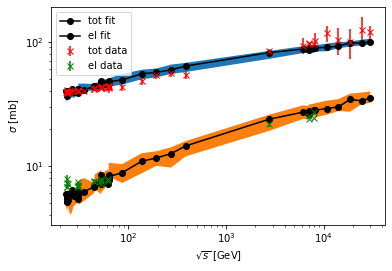

In [90]:

fig11 = plt.figure()
ax11 = fig11.add_subplot(1,1,1)
ax11.errorbar(x=sqrts,y=Crosssec,yerr=[errm,errp],linestyle='', marker='x',label='tot data', color='red')
ax11.errorbar(x=sqrtsel,y=Crosssecel,yerr=[errmel,errpel], linestyle='', marker='x',label='el data', color='green')
ax11.plot(np.sort(sqrts),testgraytot, linestyle='-', marker='o', color='black', label='tot fit')
ax11.plot(np.sort(sqrts),testgrayel, linestyle='-', marker='o', color='black', label='el fit')
ax11.fill_between(np.sort(sqrts),testp,testm)
ax11.fill_between(np.sort(sqrts),testpel,testmel)
ax11.set_yscale('log')
ax11.set_xscale('log')
ax11.set_ylabel(r"$\sigma$ [mb]")
ax11.set_xlabel(r"$\sqrt{s}$ [GeV]")
ax11.legend()


In [88]:
pargray


array([0.64362918, 0.40778366, 0.32150054, 0.08446072, 0.0604793 ])

In [89]:
fitopacity(10000,pargray[3],pargray[4])

0.641495666220552